<a href="https://colab.research.google.com/github/Tulsiv/TextClassifier/blob/main/TextClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import string
import nltk

In [2]:
!unzip drive/"My Drive"/Archive.zip

Archive:  drive/My Drive/Archive.zip
  inflating: News_Category_Dataset_v2.json  


In [3]:
df = pd.read_json('/content/News_Category_Dataset_v2.json', lines=True)

In [ ]:
df

In [ ]:
df.drop(columns=['authors','link','date','short_description'],inplace=True)
df

In [6]:
df["headline_lower"] = df["headline"].str.lower()
df.head()

,category,headline,headline_lower
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...


In [7]:
df.head()

,category,headline,headline_lower
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...


In [8]:

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["headline_punctuation"] = df["headline_lower"].apply(lambda text: remove_punctuation(text))
df.head()

,category,headline,headline_lower,headline_punctuation
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...,there were 2 mass shootings in texas last week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57,hugh grant marries for the first time at age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts castrato adam schiff and dem...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...


In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [10]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["headline_stop"] = df["headline_punctuation"].apply(lambda text: remove_stopwords(text))
df.head()

,category,headline,headline_lower,headline_punctuation,headline_stop
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...,there were 2 mass shootings in texas last week...,2 mass shootings texas last week 1 tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...,will smith joins diplo and nicky jam for the 2...,smith joins diplo nicky jam 2018 world cups of...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57,hugh grant marries for the first time at age 57,hugh grant marries first time age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts castrato adam schiff and dem...,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...


In [11]:
# aphanumeric=''
def remove_nonalphanumeric(text):
  "remove non alphanumeric words"
  return " ".join([word for word in str(text).split()if  word.isalnum()])

df["headline_nonalphanumeric"] = df["headline_stop"].apply(lambda text: remove_nonalphanumeric(text))
df.head()  

,category,headline,headline_lower,headline_punctuation,headline_stop,headline_nonalphanumeric
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...,there were 2 mass shootings in texas last week...,2 mass shootings texas last week 1 tv,2 mass shootings texas last week 1 tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...,will smith joins diplo and nicky jam for the 2...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam 2018 world cups of...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57,hugh grant marries for the first time at age 57,hugh grant marries first time age 57,hugh grant marries first time age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts castrato adam schiff and dem...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...


In [14]:
def remove_numbers(text):
  "remove numbers"
  return " ".join([word for word in str(text).split()if not word.isdigit()])

df["headline_nonumbers"] = df["headline_nonalphanumeric"].apply(lambda text: remove_numbers(text))
df.head()  

,category,headline,headline_lower,headline_punctuation,headline_stop,headline_nonalphanumeric,headline_nonumbers
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...,there were 2 mass shootings in texas last week...,2 mass shootings texas last week 1 tv,2 mass shootings texas last week 1 tv,mass shootings texas last week tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...,will smith joins diplo and nicky jam for the 2...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam world cups officia...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57,hugh grant marries for the first time at age 57,hugh grant marries first time age 57,hugh grant marries first time age 57,hugh grant marries first time age
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts castrato adam schiff and dem...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...


In [15]:
from collections import Counter
cnt = Counter()
for text in df["headline_nonumbers"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('photos', 10277),
 ('trump', 9563),
 ('new', 8550),
 ('video', 5770),
 ('us', 4604),
 ('donald', 4591),
 ('day', 4411),
 ('says', 3738),
 ('best', 3672),
 ('make', 3244)]

In [16]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["headline_stopfreq"] = df["headline_nonumbers"].apply(lambda text: remove_freqwords(text))
df.head()

,category,headline,headline_lower,headline_punctuation,headline_stop,headline_nonalphanumeric,headline_nonumbers,headline_stopfreq
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...,there were 2 mass shootings in texas last week...,2 mass shootings texas last week 1 tv,2 mass shootings texas last week 1 tv,mass shootings texas last week tv,mass shootings texas last week tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...,will smith joins diplo and nicky jam for the 2...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam world cups officia...,smith joins diplo nicky jam world cups officia...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57,hugh grant marries for the first time at age 57,hugh grant marries first time age 57,hugh grant marries first time age 57,hugh grant marries first time age,hugh grant marries first time age
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts castrato adam schiff and dem...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses poop bags pick dog


In [18]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["headline_stemmed"] = df["headline_stopfreq"].apply(lambda text: stem_words(text))
df.head()

,category,headline,headline_lower,headline_punctuation,headline_stop,headline_nonalphanumeric,headline_nonumbers,headline_stopfreq,headline_stemmed
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...,there were 2 mass shootings in texas last week...,2 mass shootings texas last week 1 tv,2 mass shootings texas last week 1 tv,mass shootings texas last week tv,mass shootings texas last week tv,mass shoot texa last week tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...,will smith joins diplo and nicky jam for the 2...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam world cups officia...,smith joins diplo nicky jam world cups officia...,smith join diplo nicki jam world cup offici song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57,hugh grant marries for the first time at age 57,hugh grant marries first time age 57,hugh grant marries first time age 57,hugh grant marries first time age,hugh grant marries first time age,hugh grant marri first time age
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts castrato adam schiff and dem...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blast castrato adam schiff democrat...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses poop bags pick dog,julianna marguli use poop bag pick dog


In [19]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["headline_lemmatized"] = df["headline_stemmed"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,category,headline,headline_lower,headline_punctuation,headline_stop,headline_nonalphanumeric,headline_nonumbers,headline_stopfreq,headline_stemmed,headline_lemmatized
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...,there were 2 mass shootings in texas last week...,2 mass shootings texas last week 1 tv,2 mass shootings texas last week 1 tv,mass shootings texas last week tv,mass shootings texas last week tv,mass shoot texa last week tv,mass shoot texa last week tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...,will smith joins diplo and nicky jam for the 2...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam world cups officia...,smith joins diplo nicky jam world cups officia...,smith join diplo nicki jam world cup offici song,smith join diplo nicki jam world cup offici song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57,hugh grant marries for the first time at age 57,hugh grant marries first time age 57,hugh grant marries first time age 57,hugh grant marries first time age,hugh grant marries first time age,hugh grant marri first time age,hugh grant marri first time age
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts castrato adam schiff and dem...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blast castrato adam schiff democrat...,jim carrey blast castrato adam schiff democrat...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses poop bags pick dog,julianna marguli use poop bag pick dog,julianna marguli use poop bag pick dog


In [50]:
RAREWORDS=[]
from numpy.ma.core import count
df1 = (df['headline_lemmatized'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
# print (df1)
ct=0
for i,j, in df1.iterrows():
    # print(j.get("count"))
    if(j.get("count")<5):
       RAREWORDS.append(j.get("vals"))

print(RAREWORDS)
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["headline_stopfreqrare"] = df["headline_lemmatized"].apply(lambda text: remove_rarewords(text))
df.head()

      

['seneg', 'jacobi', 'endgam', 'allday', 'vendi', 'allaround', 'paig', 'pong', 'changemak', 'potsmok', 'bilbo', 'karim', 'ike', 'primat', 'que', 'rhea', 'halter', 'collater', 'grandeur', 'lillard', 'fag', 'randal', '7monthold', 'macki', 'fuchsia', 'potion', 'babycent', 'gome', 'schoolyard', 'mentorship', '12year', 'jonni', 'kassig', 'mdna', 'spookiest', 'fno', 'groeneveld', 'shelley', 'cline', 'agua', 'macro', 'mileag', 'glasgow', 'candelabra', 'lankan', 'zimmern', 'diablo', 'gamewinn', 'faro', 'bavaria', 'plath', 'sleeprevolut', 'confect', 'nassif', 'damian', 'humid', 'ponzi', 'gabba', 'bulgari', 'mispercept', 'pao', 'kingston', 'maggot', 'oneshould', 'lockout', 'accumul', 'astley', 'bhldn', 'stevia', 'rockaway', 'quaker', 'knob', 'picker', '3ingredi', 'glanc', 'prism', 'instat', 'inapp', 'granit', 'wiedemann', 'paley', 'fio', 'baaaaack', 'homeopathi', 'terrorismrel', 'amphibian', 'overhyp', 'babyproof', 'workweek', 'pest', 'baggin', 'narciso', 'expressionist', 'deadspin', 'dez', 'suzi

,category,headline,headline_lower,headline_punctuation,headline_stop,headline_nonalphanumeric,headline_nonumbers,headline_stopfreq,headline_stemmed,headline_lemmatized,headline_stopfreqrare
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,there were 2 mass shootings in texas last week...,there were 2 mass shootings in texas last week...,2 mass shootings texas last week 1 tv,2 mass shootings texas last week 1 tv,mass shootings texas last week tv,mass shootings texas last week tv,mass shoot texa last week tv,mass shoot texa last week tv,mass shoot texa last week tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,will smith joins diplo and nicky jam for the 2...,will smith joins diplo and nicky jam for the 2...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam 2018 world cups of...,smith joins diplo nicky jam world cups officia...,smith joins diplo nicky jam world cups officia...,smith join diplo nicki jam world cup offici song,smith join diplo nicki jam world cup offici song,smith join diplo nicki jam world cup offici song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marries for the first time at age 57,hugh grant marries for the first time at age 57,hugh grant marries first time age 57,hugh grant marries first time age 57,hugh grant marries first time age,hugh grant marries first time age,hugh grant marri first time age,hugh grant marri first time age,hugh grant marri first time age
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts castrato adam schiff and dem...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blasts castrato adam schiff democra...,jim carrey blast castrato adam schiff democrat...,jim carrey blast castrato adam schiff democrat...,jim carrey blast adam schiff democrat artwork
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...,julianna margulies uses poop bags pick dog,julianna marguli use poop bag pick dog,julianna marguli use poop bag pick dog,use poop bag pick dog


In [51]:
df.drop(["headline_lower","headline_punctuation", "headline_stop","headline_nonalphanumeric","headline_nonumbers","headline_stopfreq","headline_stemmed","headline_lemmatized"], axis=1, inplace=True)

In [52]:
df.rename(columns = {'headline_stopfreqrare':'headlines'}, inplace = True)
df.head()

,category,headline,headlines
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,mass shoot texa last week tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,smith join diplo nicki jam world cup offici song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,hugh grant marri first time age
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blast adam schiff democrat artwork
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,use poop bag pick dog


POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


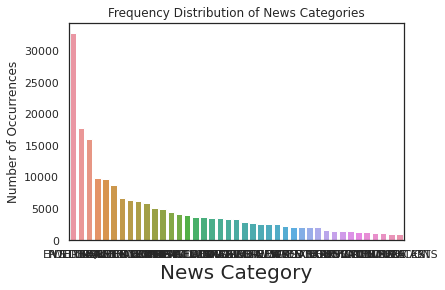

In [61]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df['category'].value_counts()
print(carrier_count)
sns.set(style="white")
sns.barplot(carrier_count.index, carrier_count.values, alpha=1)
plt.title('Frequency Distribution of News Categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('News Category', fontsize=20)
plt.show()